# **Reto Spike 2021**

* Miguel Lara
* Agosto 2021

Objetivo:
* Seguir las instrucciones del reto
* Predecir el precio de la leche con datos del Banco Central y de precipitaciones en Chile


Importar Bibliotecas

In [615]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Datos: Precipitaciones, Indicadores Económicos Banco Central y 2. Análisis de datos.**

**Lectura del primer conjunto de datos: Precipitaciones**

In [616]:
df_pre = pd.read_csv('dataSpike/precipitaciones.csv',encoding="UTF-8")
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 496 non-null    object 
 1   Coquimbo                             496 non-null    float64
 2   Valparaiso                           496 non-null    float64
 3   Metropolitana_de_Santiago            496 non-null    float64
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 5   Maule                                496 non-null    float64
 6   Biobio                               496 non-null    float64
 7   La_Araucania                         496 non-null    float64
 8   Los_Rios                             496 non-null    float64
dtypes: float64(8), object(1)
memory usage: 35.0+ KB


In [617]:
df_pre.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


Se comprueba que no hay datos nulos. Y también que los valores de cada una de las regiones tienen valores en un rango aceptable. Dónde el promedio de la precipitación mensual va de 16 a 199 aproximadamente.

Ajuste del Index cómo fecha

In [618]:
#Cambiar el index por la fecha
df_pre.index = pd.to_datetime(df_pre['date'])
#Quitar la columna fecha
df_pre.drop(['date'], axis = 1, inplace = True)
#Ordernar el index
df_pre = df_pre.sort_index()
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 1979-01-01 to 2020-04-01
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Coquimbo                             496 non-null    float64
 1   Valparaiso                           496 non-null    float64
 2   Metropolitana_de_Santiago            496 non-null    float64
 3   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64
 4   Maule                                496 non-null    float64
 5   Biobio                               496 non-null    float64
 6   La_Araucania                         496 non-null    float64
 7   Los_Rios                             496 non-null    float64
dtypes: float64(8)
memory usage: 34.9 KB


<AxesSubplot:xlabel='date'>

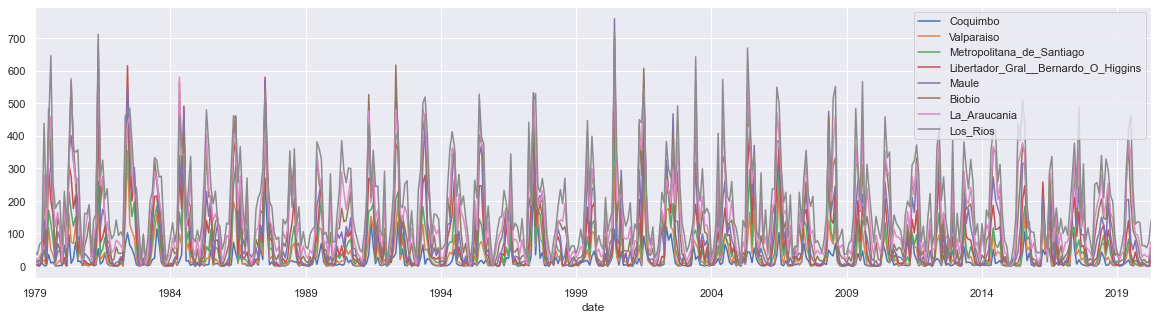

In [619]:
df_pre.plot(figsize = (20,5))

En la imagen de arriba se puede notar que la serie de tiempo no tiene el componente de tendencia, solo los componentes de estacionalidad e irregularidad. El componente cíclico tampoco aparece. 

<AxesSubplot:xlabel='date'>

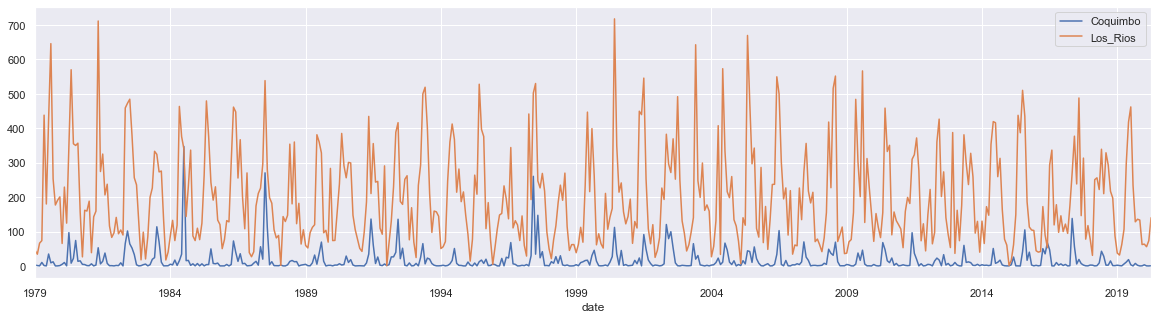

In [620]:
df_pre[['Coquimbo','Los_Rios']].plot(figsize = (20,5))

En la gráfica de arruba se puede ver una diferencia notoria en las precipitaciones de las regiones geográficamente más separadas del conjunto de datos. La región en el norte (Coquimbo) tiene menos precipitaciones que la región en el sur (Los_Rios). Interesante dato sobre Chile. 

**Lectura del segundo conjunto de datos: Banco Central**

Variables Macroeconómicas

In [621]:
df_ban = pd.read_csv('dataSpike/banco_central.csv',encoding="UTF-8")
df_ban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    object 
 2   Imacec_produccion_de_bienes                                                         300 non-null    object 
 3   Imacec_minero                                                                       300 non-null    object 
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

Se puede ver que el dataframe tiene variables diferenciadas por el prefijo, además no todas tienen el mismo número de valores, y el tipo de datos en la mayoría es object. Para un análsis más claro, siempre es mejor reducir el problema en partes más pequeñas, por ello el análsis continuará haciendo separaciones de las variables por su prefijo. Además, abriendo el CSV se puede ver el caracter 'a', así como los valores númericos con puntos. 

Ajuste del Index cómo fecha

In [622]:
#Quitar UTC del string
df_ban['Periodo'] = df_ban['Periodo'].apply( lambda x : x.replace(" UTC", ""))
#Hacer el index la fecha
df_ban.index = pd.to_datetime(df_ban['Periodo'], format="%Y-%m-%d %H:%M:%S", errors = 'coerce')
#Quitar los NaT del index que creó 'coerce'
df_ban = df_ban[df_ban.index.notnull()]
#Quitar la columna periodo
df_ban.drop(['Periodo'], axis = 1, inplace = True)
#Ordenar el index
df_ban = df_ban.sort_index()
#Remover los duplicados en el index
df_ban = df_ban[~df_ban.index.duplicated(keep='first')]
df_ban.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 611 entries, 1970-01-01 to 2020-11-01
Data columns (total 84 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Imacec_empalmado                                                                    298 non-null    object 
 1   Imacec_produccion_de_bienes                                                         298 non-null    object 
 2   Imacec_minero                                                                       298 non-null    object 
 3   Imacec_industria                                                                    299 non-null    object 
 4   Imacec_resto_de_bienes                                                              298 non-null    object 
 5   Imacec_comercio                                                                 

Separación de las variables para entenderlas y limpiarlas

1. Imacec
2. PIB
3. Precio
4. Ocupación
5. Índice
6. Otros

**1. Imacec (Índice Mensual de Actividad Económica)**

In [623]:
#Seleccionar las columnas con el prefijo Imacec 
df_ima = df_ban.filter(regex='^Imacec_',axis=1).dropna()
df_ima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 298 entries, 1996-01-01 to 2020-10-01
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Imacec_empalmado             298 non-null    object
 1   Imacec_produccion_de_bienes  298 non-null    object
 2   Imacec_minero                298 non-null    object
 3   Imacec_industria             298 non-null    object
 4   Imacec_resto_de_bienes       298 non-null    object
 5   Imacec_comercio              298 non-null    object
 6   Imacec_servicios             298 non-null    object
 7   Imacec_a_costo_de_factores   298 non-null    object
 8   Imacec_no_minero             298 non-null    object
dtypes: object(9)
memory usage: 23.3+ KB


In [624]:
df_ima.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero
count,298,298,298,298,298,298,298,298,298
unique,298,298,298,298,298,298,298,298,298
top,82.949.801,685.012.928,86.533.505,850.221.967,80.182.653,982.408.662,104.484.802,872.980.752,489.556.095
freq,1,1,1,1,1,1,1,1,1


Los valores tienen un punto y además están en dtype object. Hay necesidad de:
* quitar los puntos de los valores
* transfomar los valores a numérico
* corregir los ceros que les hacen falta a algunos números

In [625]:
def correct_zero(x):
    """
    Function to add a zero to the values that require it
    Example: 65,000,000 changed to 650,000,000  or 100,000,000 to 1,000,000,000. 
    Input: number
    Output: number corrected if necessary
    """
    value = x/100000000
    if value <= 0.002:
        return x*10000
    elif value <= 0.02:
        return x*1000
    elif value <= 0.2:
        return x*100
    elif value <= 2:
        return x*10
    else:
        return x
    
correct_zero(204002273)

204002273

In [626]:
#Quitar los puntos
df_ima_c = df_ima.applymap(lambda x: x.replace('.',''))
#Convertir a numericos
columns = df_ima_c.columns
df_ima_c[columns] = df_ima_c[columns].astype(float)
#Corregir los ceros
df_ima_c = df_ima_c.applymap(lambda x : correct_zero(x))
df_ima_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 298 entries, 1996-01-01 to 2020-10-01
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Imacec_empalmado             298 non-null    float64
 1   Imacec_produccion_de_bienes  298 non-null    float64
 2   Imacec_minero                298 non-null    float64
 3   Imacec_industria             298 non-null    float64
 4   Imacec_resto_de_bienes       298 non-null    float64
 5   Imacec_comercio              298 non-null    float64
 6   Imacec_servicios             298 non-null    float64
 7   Imacec_a_costo_de_factores   298 non-null    float64
 8   Imacec_no_minero             298 non-null    float64
dtypes: float64(9)
memory usage: 23.3 KB


<AxesSubplot:xlabel='Periodo'>

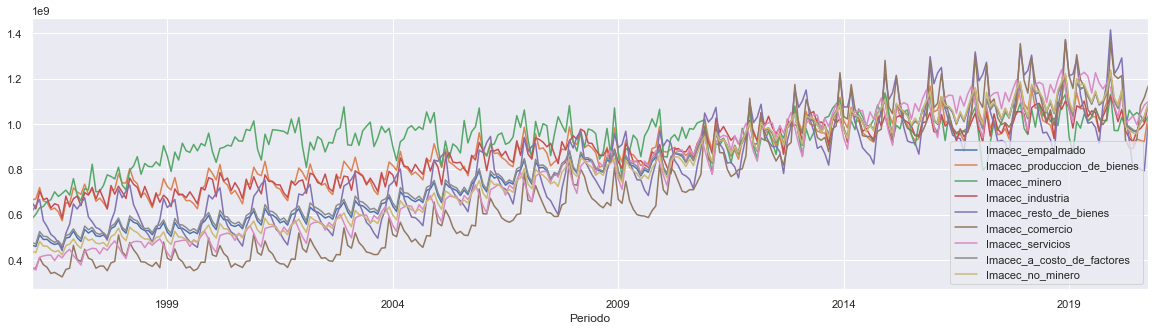

In [627]:
df_ima_c.plot(figsize = (20,5))

Las gráfica de arriba muestra las series de tiempo arregladas para las variables del Imacec. 

**2. PIB**

In [628]:
#Seleccionar las columnas con el prefijo  
df_pib = df_ban.filter(regex='^PIB',axis=1).dropna()
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2013-01-01 to 2020-09-01
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   PIB_Agropecuario_silvicola                    93 non-null     object
 1   PIB_Pesca                                     93 non-null     object
 2   PIB_Mineria                                   93 non-null     object
 3   PIB_Mineria_del_cobre                         93 non-null     object
 4   PIB_Otras_actividades_mineras                 93 non-null     object
 5   PIB_Industria_Manufacturera                   93 non-null     object
 6   PIB_Alimentos                                 93 non-null     object
 7   PIB_Bebidas_y_tabaco                          93 non-null     object
 8   PIB_Textil                                    93 non-null     object
 9   PIB_Maderas_y_muebles                         93 non-null 

In [629]:
df_pib.describe()

,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,...,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB
count,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
unique,93,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
top,555.875.498,545.913.031,137.802.787,110.157.514,120.810.436,120.825.482,318.590.821,155.860.699,273.539.854,675.912.639,...,206.481.563,516.098.618,418.252.147,578.992.271,119.379.058,852.677.224,162.780.323,545.404.443,107.541.772,12.603.131
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [630]:
#Quitar los puntos
df_pib_c = df_pib.applymap(lambda x: x.replace('.',''))
#Convertir a numéricos
columns = df_pib_c.columns
df_pib_c[columns] = df_pib_c[columns].astype(float)
#Corregir los ceros
df_pib_c = df_pib_c.rolling(3).mean()
df_pib_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 2013-01-01 to 2020-09-01
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   PIB_Agropecuario_silvicola                    91 non-null     float64
 1   PIB_Pesca                                     91 non-null     float64
 2   PIB_Mineria                                   91 non-null     float64
 3   PIB_Mineria_del_cobre                         91 non-null     float64
 4   PIB_Otras_actividades_mineras                 91 non-null     float64
 5   PIB_Industria_Manufacturera                   91 non-null     float64
 6   PIB_Alimentos                                 91 non-null     float64
 7   PIB_Bebidas_y_tabaco                          91 non-null     float64
 8   PIB_Textil                                    91 non-null     float64
 9   PIB_Maderas_y_muebles                         9

<AxesSubplot:xlabel='Periodo'>

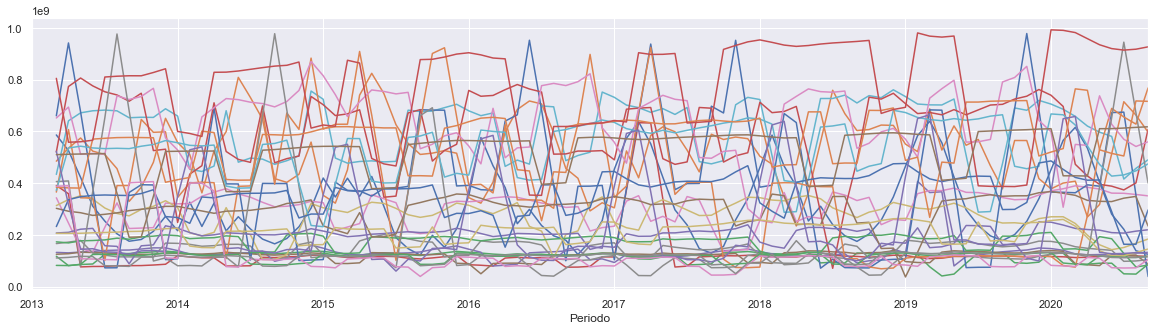

In [631]:
df_pib_c.plot(figsize = (20,5), legend = False)

**3. Precio** 

In [632]:
#Seleccionar las columnas con el prefijo  
df_pri = df_ban.filter(regex='^Precio_',axis=1).dropna()
df_pri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2008-01-01 to 2020-11-01
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Precio_de_la_gasolina_en_EEUU_dolaresm3                               155 non-null    object 
 1   Precio_de_la_onza_troy_de_oro_dolaresoz                               155 non-null    float64
 2   Precio_de_la_onza_troy_de_plata_dolaresoz                             155 non-null    float64
 3   Precio_del_cobre_refinado_BML_dolareslibra                            155 non-null    object 
 4   Precio_del_diesel_centavos_de_dolargalon                              155 non-null    float64
 5   Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas  155 non-null    float64
 6   Precio_del_petroleo_Brent_dolaresbarril                               155 non-n

In [633]:
#Quitar los puntos de las variables string
df_pri_str = df_pri.select_dtypes(exclude=np.number).applymap(lambda x: x.replace('.',''))
#Convertir a numéricos
columns = df_pri_str.columns
df_pri_str[columns] = df_pri_str[columns].astype(float)
#Corregir los ceros
df_pri_str = df_pri_str.rolling(3).mean()
#Corregir los ceros de las variables numéricas
df_pri_num = df_pri.select_dtypes(np.number).rolling(3).mean()
#Concatenar los dos dataframes 
df_pri_c = pd.concat([df_pri_str,df_pri_num], axis = 1)
df_pri_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2008-01-01 to 2020-11-01
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Precio_de_la_gasolina_en_EEUU_dolaresm3                               153 non-null    float64
 1   Precio_del_cobre_refinado_BML_dolareslibra                            153 non-null    float64
 2   Precio_del_kerosene_dolaresm3                                         153 non-null    float64
 3   Precio_de_la_onza_troy_de_oro_dolaresoz                               153 non-null    float64
 4   Precio_de_la_onza_troy_de_plata_dolaresoz                             153 non-null    float64
 5   Precio_del_diesel_centavos_de_dolargalon                              153 non-null    float64
 6   Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas  153 non-n

<AxesSubplot:xlabel='Periodo'>

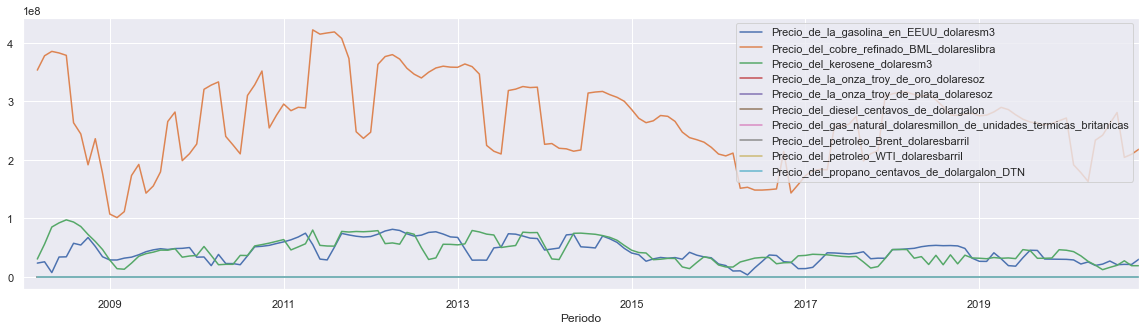

In [634]:
df_pri_c.plot(figsize = (20,5))

**4. Ocupación**

In [635]:
#Seleccionar las columnas con el prefijo  
df_ocu = df_ban.filter(regex='^Ocupacion_',axis=1).dropna()
df_ocu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2013-03-01 to 2020-10-01
Data columns (total 21 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Ocupacion_en_Agricultura_INE                                                        92 non-null     object
 1   Ocupacion_en_Explotacion_de_minas_y_canteras_INE                                    92 non-null     object
 2   Ocupacion_en_Industrias_manufactureras_INE                                          92 non-null     object
 3   Ocupacion_en_Suministro_de_electricidad_INE                                         92 non-null     object
 4   Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE                92 non-null     object
 5   Ocupacion_en_Actividades_profesionales_INE                                          92 n

In [636]:
#Quitar los puntos
df_ocu_c = df_ocu.applymap(lambda x: x.replace('.',''))
#Convertir a numéricos
columns = df_ocu_c.columns
df_ocu_c[columns] = df_ocu_c[columns].astype(float)
#Corregir los ceros
df_ocu_c = df_ocu_c.rolling(3).mean()
df_ocu_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2013-03-01 to 2020-10-01
Data columns (total 21 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Ocupacion_en_Agricultura_INE                                                        90 non-null     float64
 1   Ocupacion_en_Explotacion_de_minas_y_canteras_INE                                    90 non-null     float64
 2   Ocupacion_en_Industrias_manufactureras_INE                                          90 non-null     float64
 3   Ocupacion_en_Suministro_de_electricidad_INE                                         90 non-null     float64
 4   Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE                90 non-null     float64
 5   Ocupacion_en_Actividades_profesionales_INE                                       

<AxesSubplot:xlabel='Periodo'>

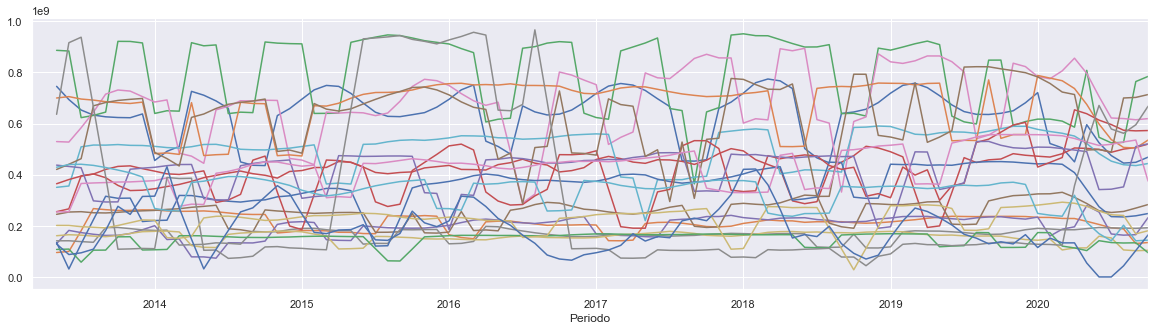

In [637]:
df_ocu_c.plot(figsize = (20,5),legend=False)

**5. Índice** 

In [638]:
#Seleccionar las columnas con el prefijo  
df_ind = df_ban.filter(regex='^Indice_',axis=1).dropna()
df_ind.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2014-01-01 to 2020-10-01
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100     82 non-null     object
 1   Indice_de_produccion_industrial                           82 non-null     object
 2   Indice_de_produccion_industrial__mineria                  82 non-null     object
 3   Indice_de_produccion_industrial_electricidad__gas_y_agua  82 non-null     object
 4   Indice_de_produccion_industrial__manufacturera            82 non-null     object
 5   Indice_de_ventas_comercio_real_IVCM                       82 non-null     object
 6   Indice_de_ventas_comercio_real_no_durables_IVCM           82 non-null     object
 7   Indice_de_ventas_comercio_real_durables_IVCM              82 non-null     object
dtypes: object(8)


In [639]:
#Quitar los puntos
df_ind_c = df_ind.applymap(lambda x: x.replace('.',''))
#Convertir a numéricos
columns = df_ind_c.columns
df_ind_c[columns] = df_ind_c[columns].astype(float)
#Corregir los ceros
df_ind_c = df_ind_c.applymap(lambda x : correct_zero(x))
df_ind_c = df_ind_c.rolling(3).mean()
df_ind_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2014-01-01 to 2020-10-01
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100     80 non-null     float64
 1   Indice_de_produccion_industrial                           80 non-null     float64
 2   Indice_de_produccion_industrial__mineria                  80 non-null     float64
 3   Indice_de_produccion_industrial_electricidad__gas_y_agua  80 non-null     float64
 4   Indice_de_produccion_industrial__manufacturera            80 non-null     float64
 5   Indice_de_ventas_comercio_real_IVCM                       80 non-null     float64
 6   Indice_de_ventas_comercio_real_no_durables_IVCM           80 non-null     float64
 7   Indice_de_ventas_comercio_real_durables_IVCM              80 non-null     float64
dtypes: 

<AxesSubplot:xlabel='Periodo'>

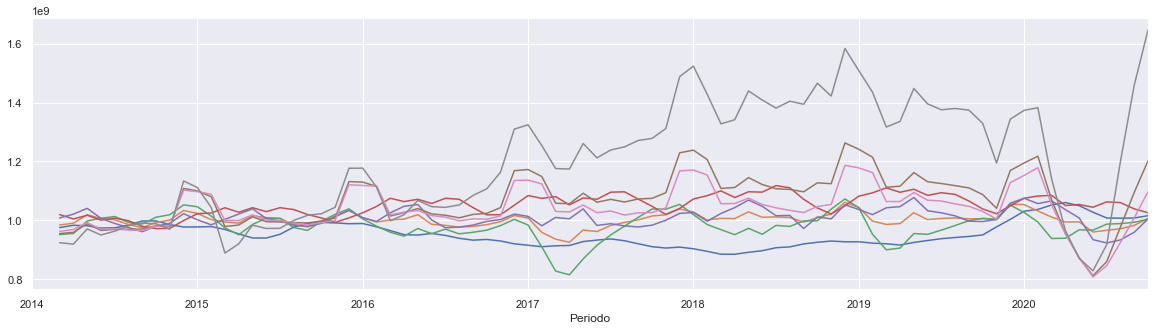

In [640]:
df_ind_c.plot(figsize = (20,5), legend = False)

**6. Otros**

In [641]:
#Variable que no tienen prefijo
cols = ['Ocupados','No_sabe__No_responde_Miles_de_personas','Tipo_de_cambio_nominal_multilateral___TCM',
       'Generacion_de_energia_electrica_CDEC_GWh','Ventas_autos_nuevos'] 

df_otr = df_ban[cols].dropna()
df_otr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2020-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Ocupados                                   10 non-null     object 
 1   No_sabe__No_responde_Miles_de_personas     10 non-null     object 
 2   Tipo_de_cambio_nominal_multilateral___TCM  10 non-null     object 
 3   Generacion_de_energia_electrica_CDEC_GWh   10 non-null     object 
 4   Ventas_autos_nuevos                        10 non-null     float64
dtypes: float64(1), object(4)
memory usage: 480.0+ bytes


Estas variables solo se tienen valores del año 2020, no considero que sea útil agregar por ahora esos datos

**Resumen de los datos del Banco Central**

| Dataframe  | Fechas             | Núm valores | Series de tiempo                                                    |
|------------|--------------------|-------------|---------------------------------------------------------------------|
| Imacec     | 1996/01 al 2020/10 | 298         | con estacionalidad, irregularidad y tendencia y sin ciclos.         |
| PIB        | 2013/03 al 2020/09 | 91          | con estacionalidad, irregularidad y posible ciclos y sin tendencia. |
| Precio     | 2008/03 al 2020/11 | 153         | con estacionalidad, irregularidad y posible ciclos y sin tendencia. |
| Ocupación  | 2013/05 al 2020/10 | 90          | con estacionalidad, irregularidad y posible ciclos y sin tendencia. |
| Índice     | 2014/03 al 2020/10 | 80          | con estacionalidad, irregularidad, posible ciclos y tendencia.      |


Casi todos los conjuntos de valores se recorrieron 3 meses debido al Rolling de 3 meses. Es decir, se quitaron 2 meses para cada uno de los conjuntos menos para Imacec.

In [642]:
#Unión de los 5 dataframes en uno
df_ban_c = pd.merge(df_ima_c, df_pib_c, how = 'outer', left_index=True, right_index=True)
df_ban_c = pd.merge(df_ban_c, df_pri_c, how = 'outer', left_index=True, right_index=True)
df_ban_c = pd.merge(df_ban_c, df_ocu_c, how = 'outer', left_index=True, right_index=True)
df_ban_c = pd.merge(df_ban_c, df_ind_c, how = 'outer', left_index=True, right_index=True)

df_ban_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 299 entries, 1996-01-01 to 2020-11-01
Data columns (total 76 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Imacec_empalmado                                                                    298 non-null    float64
 1   Imacec_produccion_de_bienes                                                         298 non-null    float64
 2   Imacec_minero                                                                       298 non-null    float64
 3   Imacec_industria                                                                    298 non-null    float64
 4   Imacec_resto_de_bienes                                                              298 non-null    float64
 5   Imacec_comercio                                                                 

# **3. Visualización**

**Función para gráficar la precipitación en dos regiones**

<AxesSubplot:xlabel='date'>

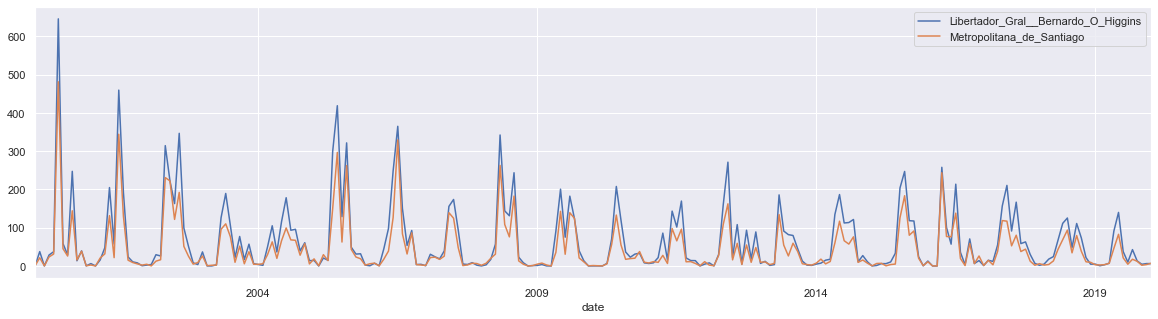

In [643]:
df_pre_plot = df_pre.copy()


def plot_precipitations(place1, place2, start_date, end_date):
    """
    Function to plot the precipitations dataframe
    Input: place1, place2, start_date, end date -> all the inputs should be in string
    Output: plot of the precipitations for the selected two regions and dates
    """
    if (place1 in df_pre_plot.columns) and (place2 in df_pre_plot.columns):
        if (start_date in df_pre_plot.index) and (end_date in df_pre_plot.index):
            return df_pre_plot[[place1,place2]][start_date:end_date].plot( figsize = (20,5))
        else:
            return "Date not available. The availables dates are from {0} to {1}".format(df_pre_plot.index[0],
                                                                                         df_pre_plot.index[-1])
    else:
        return ("Place not available. The availables places are: " + ', '.join(df_pre_plot.columns))
    
plot_precipitations('Libertador_Gral__Bernardo_O_Higgins',
                    'Metropolitana_de_Santiago', '2000-01-01', '2020-01-01') 

En la gráfica de arriba se puede ver que las precipitaciones son muy similares de las dos regiones. Esto es debido a que las regiones son vecinas. Sin embargo, la región de Libertador Gral. Bernardo O'Higgins tiene picos más altos y esto se debe a qué la región se encuentra al sur con respecto a la región Metropolitana de Santiago. Dato que se había resaltado en el principio de este análisis, entre la región se encuentre más al sur hay más precipitación.

**Función para gráficar diferentes años de precipitación de una región**

'Plot'

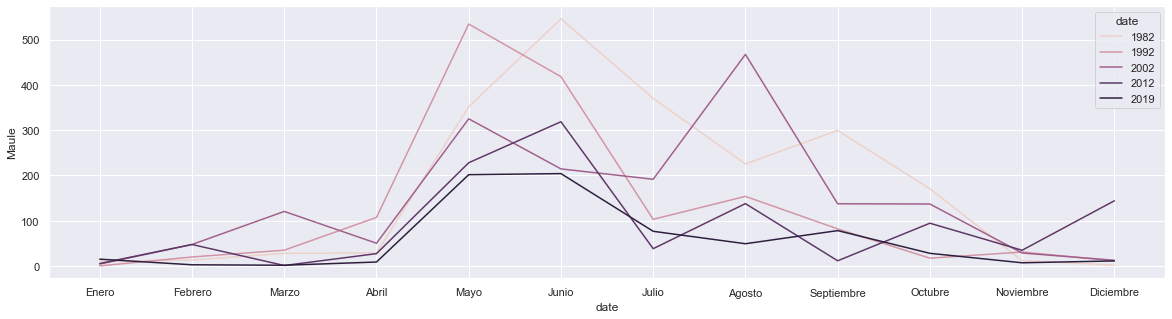

In [644]:
import seaborn as sns

df_pre_reg = df_pre.copy()

def plot_region_precipitations(place,list_years):
    """
    Function to plot the precipitations of one region for each year required
    Input: place, list of years
    Output: plot of the precipitations of different years of the region
    """
    if (place in df_pre_reg.columns):
        if set(list_years).issubset(set(df_pre_reg.index.year.unique().to_list())):
            boolean_series = df_pre_reg.index.year.isin(list_years)
            df_filtered = df_pre_reg[boolean_series]
            fig, ax = plt.subplots(figsize=(20,5))
            g = sns.lineplot(x=df_filtered.index.month,y=place,hue=df_filtered.index.year,
                             data=df_filtered, ax = ax)
            plt.setp(ax,xticks=[1,2,3,4,5,6,7,8,9,10,11,12])
            g.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio',
                              'Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])
            return 'Plot'
        else:
            return "Date not available. The availables dates are from {0} to {1}".format(df_pre_reg.index[0].year,
                                                                                         df_pre_reg.index[-1].year)
    else:
        return ("Place not available. The availables places are: " + ', '.join(df_pre_reg.columns))
    
plot_region_precipitations('Maule',[1982,1992,2002,2012,2019]) 

La gráfica de arriba muestra las precipitaciones de la región Maule de cada 10 años desde 1982. Tristemente se puede observar que el nivel pico de precipitaciones ha estado bajando desde un pico en junio del 1982 por arriba de 500mm a un pico en junio del 2019 cerca de 200mm.

**Función para gráficar dos series históricas del PIB**

<AxesSubplot:xlabel='Periodo'>

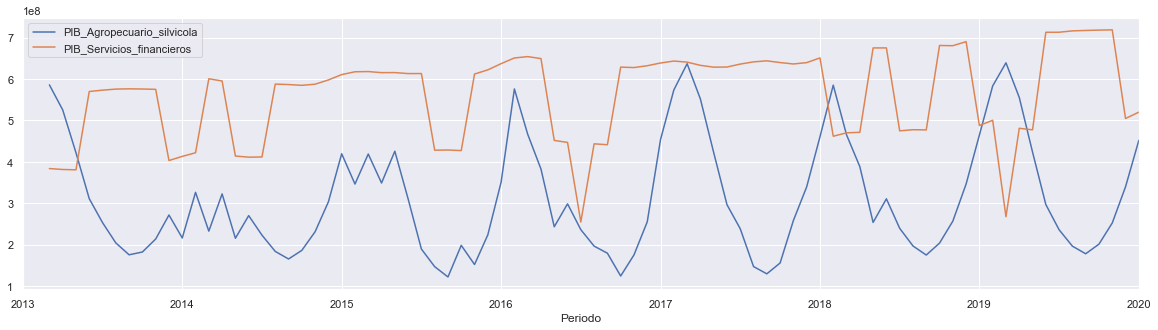

In [645]:
df_pib_plot = df_pib_c.copy()

def plot_pib(pib1, pib2, start_date, end_date):
    """
    Function to plot the time series of two PIBs
    Input: pib1, pib2, start_date, end date -> all the inputs should be in string
    Output: plot of the PIB for the selected two activities and dates
    """
    if (pib1 in df_pib_plot.columns) and (pib2 in df_pib_plot.columns):
        if (start_date in df_pib_plot.index) and (end_date in df_pib_plot.index):
            return df_pib_plot[[pib1,pib2]][start_date:end_date].plot( figsize = (20,5))
        else:
            return "Date not available. The availables dates are from {0} to {1}".format(df_pib_plot.index[0],
                                                                                         df_pib_plot.index[-1])
    else:
        return ("Place not available. The availables places are: " + ', '.join(df_pib_plot.columns))
    
plot_pib('PIB_Agropecuario_silvicola',
                    'PIB_Servicios_financieros', '2013-01-01', '2020-01-01') 

En la gráfica de arriba se pueden notar varias característias:

* Sobre el PIB agropecuario y silvícola
    * Se puede notar una tendencia positiva
    * Se puede notar un componente cíclico regular 
    * Es decir, a principios de cada año hay un incremento y a finales hay una bajada en el indicador 
    * La amplitud del indicador ha ido incrementando
    
* Sobre el PIB de servicios financieros
    * Se puede notar una tendencia positiva
    * Se puede notar un componente cíclico irregular
    * Es decir, el indicador fluctúa pero no se puede notar algún patrón entre años
    * La amplitud del indicador ha ido incrementando

* Sobre la relación entre los dos:
    * Del 2014 al 2017 se puede notar una correlación positiva entre los dos PIB
    * Pero en el 2013 y a partir del 2017 en adelante se empieza a notar una correlación negativa entre los dos PIBs
    * El PIB agropecuario y silvícola tuvo una tendencia con una pendiente más positiva que el PIB de servicios financieros
    * No obstante, la amplitud del PIB de servicios financieros es más pequeña que la del PIB agropecuario y silvícola.

# 4. Tratamiento y creación de variables

**Lectura de los datos del precio de la leche**

In [646]:
df_lec = pd.read_csv('dataSpike/precio_leche.csv',encoding="UTF-8")
df_lec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Anio          506 non-null    int64  
 1   Mes           506 non-null    object 
 2   Precio_leche  506 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.0+ KB


In [647]:
def update_month(x):
    """
    Function that updates the month name to month number
    Input: month name
    Output: month number
    """
    if x == 'Ene':
        return '01'
    elif x == 'Feb':
        return '02'
    elif x == 'Mar':
        return '03' 
    elif x == 'Abr':
        return '04'
    elif x == 'May':
        return '05'
    elif x == 'Jun':
        return '06'
    elif x == 'Jul':
        return '07'
    elif x == 'Ago':
        return '08'
    elif x == 'Sep':
        return '09'
    elif x == 'Oct':
        return '10'
    elif x == 'Nov':
        return '11'
    elif x == 'Dic':
        return '12'

In [648]:
#Actualizar el nombre del mes por el número del mes
df_lec['Mes'] = df_lec['Mes'].apply(lambda x : update_month(x))
#Cambiar el tipo de dato del anio por string
df_lec['Anio']= df_lec['Anio'].apply(str)
#Crear la nueva variable date
df_lec['date'] = df_lec['Anio']+'-'+ df_lec['Mes']
#Ajustar el index con la nueva variable
df_lec.index = pd.to_datetime(df_lec['date'] , format="%Y-%m", errors = 'coerce')
#Remover variables no necesarias
df_lec.drop(['Mes', 'Anio','date'], axis = 1, inplace = True)
df_lec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 1979-01-01 to 2021-02-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Precio_leche  506 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


<AxesSubplot:xlabel='date'>

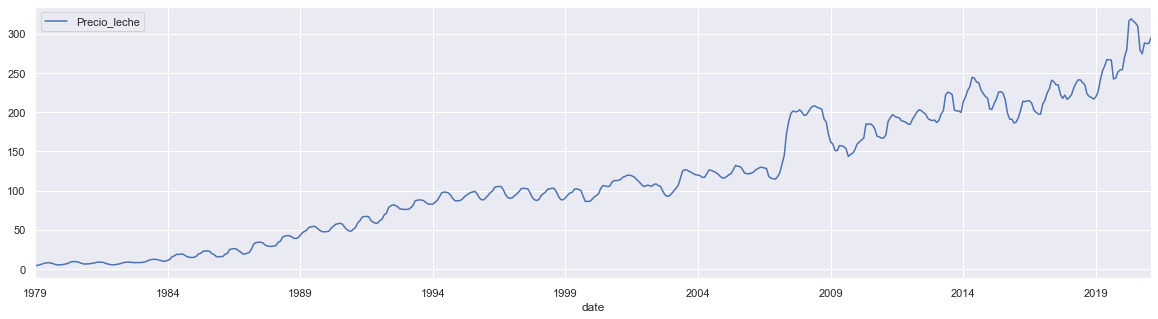

In [649]:
#Serie de tiempo del precio de la leche
df_lec.plot(figsize = (20,5))

La gráfica de arriba muestra la serie de tiempo del precio de la leche. Aquí se puede ver que hay tendencia postiva, hay estacionalidad y posiblemente el componente de ciclo.

**Unión de los dataframes**

In [650]:
df_spi = pd.merge(df_pre, df_ban_c, how = 'outer', left_index=True, right_index=True)
df_spi = pd.merge(df_spi, df_lec, how = 'outer', left_index=True, right_index=True)
df_spi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 1979-01-01 to 2021-02-01
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Coquimbo                                                                            496 non-null    float64
 1   Valparaiso                                                                          496 non-null    float64
 2   Metropolitana_de_Santiago                                                           496 non-null    float64
 3   Libertador_Gral__Bernardo_O_Higgins                                                 496 non-null    float64
 4   Maule                                                                               496 non-null    float64
 5   Biobio                                                                          

**Creación de las varaibles año, mes y trimestre**

In [651]:
df_spi['Anio'] = df_spi.index.year
df_spi['Mes'] = df_spi.index.month
df_spi['Trimestre'] = df_spi.index.to_period("Q")
df_spi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 1979-01-01 to 2021-02-01
Data columns (total 88 columns):
 #   Column                                                                              Non-Null Count  Dtype        
---  ------                                                                              --------------  -----        
 0   Coquimbo                                                                            496 non-null    float64      
 1   Valparaiso                                                                          496 non-null    float64      
 2   Metropolitana_de_Santiago                                                           496 non-null    float64      
 3   Libertador_Gral__Bernardo_O_Higgins                                                 496 non-null    float64      
 4   Maule                                                                               496 non-null    float64      
 5   Biobio                                

**Correlación entre variables: primer corte**

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

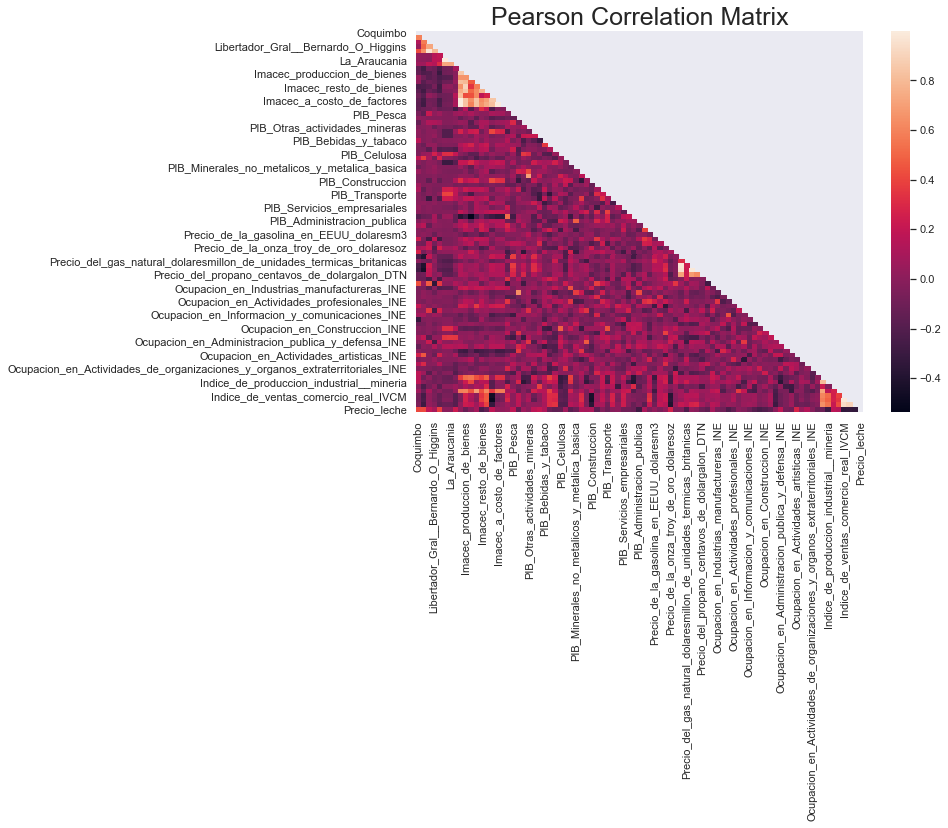

In [652]:
#Usar series estacionarias
df_spi_est = df_spi.iloc[:,:-3].pct_change()
#Fechas disponibles para el dataframe de precipitaciones, banco central y precio de leche
df_spi_est = df_spi_est['2014-04':'2020-04']

#Correlación de pearson
f, ax = plt.subplots(figsize=(10, 7))
plt.title('Pearson Correlation Matrix',fontsize=25)

corr = df_spi_est.corr(method = 'pearson') #pearson 

mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 


sns.heatmap(corr, annot=False, mask = mask)

Las gráfica de arriba muestra las correlaciones entre todas la variables. No obstante, se es recomendable reducir el número de variables. Por lo tanto, para el primer corte se van a tomar en cuenta las variables que tengan una correlación arriba de 0.2 con la variable del precio de la leche. 

In [653]:
#variables que tienen una correlación absoluta mayor de 0.2
corr['Precio_leche'][abs(corr['Precio_leche']).sort_values(ascending= False) > 0.2]

Coquimbo                                                                0.417650
Valparaiso                                                              0.419459
Maule                                                                   0.382264
Los_Rios                                                                0.232433
Imacec_resto_de_bienes                                                 -0.224680
PIB_Alimentos                                                           0.214132
PIB_Administracion_publica                                             -0.276929
Precio_de_la_onza_troy_de_oro_dolaresoz                                 0.270527
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas   -0.219371
Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE   -0.218581
Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE   -0.236680
Ocupacion_en_Construccion_INE                                          -0.203209
Ocupacion_en_Actividades_art

In [654]:
#Lista de variables más correlacionadas
corr_var = corr['Precio_leche'][abs(corr['Precio_leche']).sort_values(ascending= False) > 0.2].index.to_list()
#Nuevo dataframe para el 1er corte
df_spi_1c = df_spi_est[corr_var]
df_spi_1c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2014-04-01 to 2020-04-01
Data columns (total 18 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Coquimbo                                                              73 non-null     float64
 1   Valparaiso                                                            73 non-null     float64
 2   Maule                                                                 73 non-null     float64
 3   Los_Rios                                                              73 non-null     float64
 4   Imacec_resto_de_bienes                                                73 non-null     float64
 5   PIB_Alimentos                                                         73 non-null     float64
 6   PIB_Administracion_publica                                            73 non-nul

**Correlación de variables: segundo corte**

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

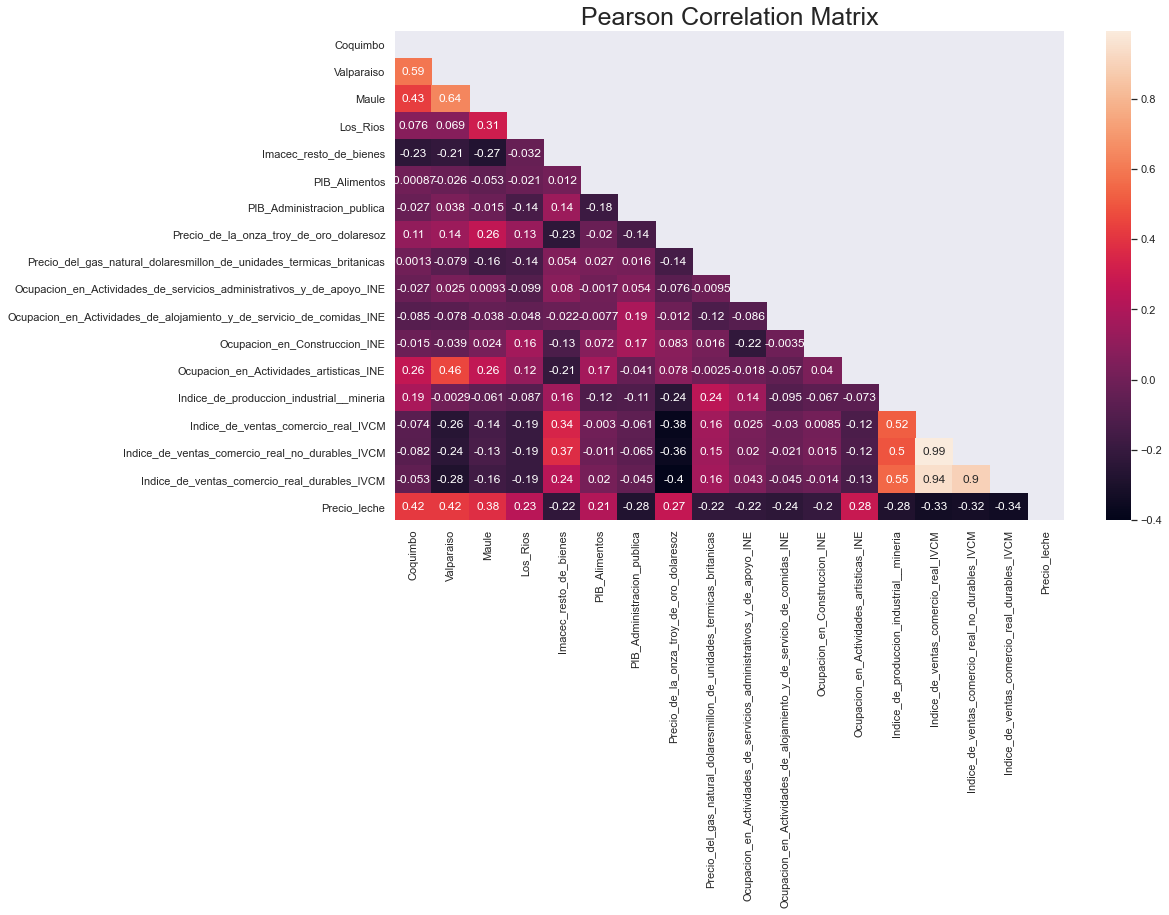

In [655]:
#Correlación de pearson
f, ax = plt.subplots(figsize=(15, 9))
plt.title('Pearson Correlation Matrix',fontsize=25)

corr2 = df_spi_1c.corr(method = 'pearson') #pearson 

mask = np.zeros_like(corr2, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 


sns.heatmap(corr2, annot=True, mask = mask)

De la gráfica de arriba se puede ver que hay variables con una correlación moderada(>= 0.5). Por lo tanto, para reducir el número de variables se prone eliminar una de las variables del par que tenga una correlación >= 0.5. La variable que se elimine es la que tiene menos correlación con la variable objetivo (Precio_leche). 

* Se elimina Coquimbo y Maule porque tiene correlación moderada con Valparaiso.
* Se elimina Indice_de_ventas_comercio_real_no_durables_IVCM, Indice_de_ventas_comercio_real_IVCM y Indice_de_produccion_industrial__mineria poque tiene correlación moderada y alta con Indice_de_ventas_comercio_real_durables_IVCM.

In [656]:
to_remove = ['Coquimbo','Maule' ,'Indice_de_ventas_comercio_real_no_durables_IVCM',
             'Indice_de_ventas_comercio_real_IVCM','Indice_de_produccion_industrial__mineria']

#Nuevo dataframe para el 2do corte
df_spi_2c = df_spi_1c.drop(to_remove, axis = 1)
df_spi_2c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2014-04-01 to 2020-04-01
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Valparaiso                                                            73 non-null     float64
 1   Los_Rios                                                              73 non-null     float64
 2   Imacec_resto_de_bienes                                                73 non-null     float64
 3   PIB_Alimentos                                                         73 non-null     float64
 4   PIB_Administracion_publica                                            73 non-null     float64
 5   Precio_de_la_onza_troy_de_oro_dolaresoz                               73 non-null     float64
 6   Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas  73 non-nul

In [657]:
df_spi_2c.describe()

,Valparaiso,Los_Rios,Imacec_resto_de_bienes,PIB_Alimentos,PIB_Administracion_publica,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Actividades_artisticas_INE,Indice_de_ventas_comercio_real_durables_IVCM,Precio_leche
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,127.336082,0.435105,0.003955,0.019568,0.007309,0.003321,-0.012556,0.015005,0.015184,0.015694,0.063537,0.002573,0.005145
std,828.966351,1.701424,0.103915,0.200468,0.146462,0.019947,0.059392,0.157759,0.164279,0.145983,0.443253,0.063060,0.035583
min,-0.998153,-0.975855,-0.188110,-0.418950,-0.328632,-0.045868,-0.124200,-0.471880,-0.477763,-0.303592,-0.729660,-0.174937,-0.090626
25%,-0.809269,-0.380923,-0.072173,-0.035090,-0.001528,-0.011468,-0.050863,-0.016650,-0.008651,-0.006931,-0.018462,-0.021479,-0.014393
50%,0.088289,-0.017817,-0.010954,0.004793,0.002463,0.002895,-0.014721,0.000874,0.003282,0.001969,0.004379,0.005486,-0.000093
75%,3.761649,0.506238,0.066923,0.045629,0.005309,0.015012,0.018756,0.025013,0.019871,0.009373,0.021557,0.024068,0.027026
max,7007.439024,10.385906,0.244605,0.793928,0.493834,0.054026,0.155902,0.823241,0.882062,0.444391,2.565419,0.168898,0.129949


**Creación de nuevas variables**

Para ello se aplicó el granger test para saber si existe una diferencia significativa en el impacto que tienen los valores pasados de las variables independientes en la variable dependiente. Para esto se tomó en cuenta un promedio del p-value de las pruebas estadísticas menor a 0.01. El lag aplicado son máximo 6 meses.

In [658]:
import statsmodels as sm

df_spi_3c = df_spi_2c.copy()

lag = 6

#El test se corre para cada una de las variables independientes con respecto a la dependiente
for col in df_spi_3c.columns:
    granger_test = sm.tsa.stattools.grangercausalitytests(df_spi_3c[['Precio_leche',col]], 
                                                      maxlag=lag, verbose=False)
    #Obtener el promedio de los 4 test
    for i in range(0,lag):
        a = granger_test.get(i+1)[0].get('ssr_ftest')[1]
        b = granger_test.get(i+1)[0].get('ssr_chi2test')[1]
        c = granger_test.get(i+1)[0].get('lrtest')[1]
        d = granger_test.get(i+1)[0].get('params_ftest')[1]

        res = (i+1,np.mean([a,b,c,d]))
        #Terminar si se encuentra el primer lag con significancia menor a 0.01
        if res[1] < 0.01:
            print (col,res)
            break    


Imacec_resto_de_bienes (4, 0.002582752891042172)
Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE (3, 0.004312419904668373)
Indice_de_ventas_comercio_real_durables_IVCM (4, 0.0001992291884591511)


El texto de arriba muestra las variables que muestran un impacto estadísticamente significativo en la variable objetivo. El resultado tiene el formato siguiente: Nombre de la variable (lag, promedio de las pruebas estadísticas). 

* Por ello se crearán 3 variables más con el lag especificado por la prueba granger.
* Por accidente se encontró que tomando el lag especificado por la prubea de granger en el cálculo del pct_change() se crea una variable moderadamente correlacionada con Precio_leche. Es decir, se crearan 3 variables más con el pct_change() con el lag especificado.

In [659]:
#Fecha del 2014-04 al 2020-04... 
#IMA hasta el 2020-10 -> recorrer 4 -> tomar desde el 2020-08
#Ocu hasta el 2020-10 -> recorrer 3 -> tomar desde el 2020-07
#Ind hasta el 2020-10 -> recorrer 4 -> tomar desde el 2020-08

#Variables con el shift después del pct_change()
df_spi_3c['Imacec_resto_de_bienes_L4'] = df_ima_c['Imacec_resto_de_bienes']['2014-04':'2020-08'].pct_change().shift(-4)
df_spi_3c['Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE_L3'] = df_ocu_c['Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE']['2014-04':'2020-07'].pct_change().shift(-3)
df_spi_3c['Indice_de_ventas_comercio_real_durables_IVCM_L4'] = df_ind_c['Indice_de_ventas_comercio_real_durables_IVCM']['2014-04':'2020-08'].pct_change().shift(-4)

#Variables con lag desde el cambio porcentual 
df_spi_3c['Imacec_resto_de_bienes_PL4'] = df_ima_c['Imacec_resto_de_bienes']['2014-04':'2020-08'].pct_change(-4)
df_spi_3c['Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE_PL3'] = df_ocu_c['Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE']['2014-04':'2020-07'].pct_change(-3)
df_spi_3c['Indice_de_ventas_comercio_real_durables_IVCM_PL4'] = df_ind_c['Indice_de_ventas_comercio_real_durables_IVCM']['2014-04':'2020-08'].pct_change(-4)

In [660]:
df_spi_3c.columns

Index(['Valparaiso', 'Los_Rios', 'Imacec_resto_de_bienes', 'PIB_Alimentos',
       'PIB_Administracion_publica', 'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE',
       'Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE',
       'Ocupacion_en_Construccion_INE',
       'Ocupacion_en_Actividades_artisticas_INE',
       'Indice_de_ventas_comercio_real_durables_IVCM', 'Precio_leche',
       'Imacec_resto_de_bienes_L4',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE_L3',
       'Indice_de_ventas_comercio_real_durables_IVCM_L4',
       'Imacec_resto_de_bienes_PL4',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE_PL3',
       'Indice_de_ventas_comercio_real_durables_IVCM_PL4'],
      dtype='object')

In [661]:
#Mover el target al final
cols = ['Valparaiso', 'Los_Rios', 'Imacec_resto_de_bienes', 'PIB_Alimentos',
       'PIB_Administracion_publica', 'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE',
       'Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE',
       'Ocupacion_en_Construccion_INE',
       'Ocupacion_en_Actividades_artisticas_INE',
       'Indice_de_ventas_comercio_real_durables_IVCM',
       'Imacec_resto_de_bienes_L4',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE_L3',
       'Indice_de_ventas_comercio_real_durables_IVCM_L4',
       'Imacec_resto_de_bienes_PL4',
       'Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE_PL3',
       'Indice_de_ventas_comercio_real_durables_IVCM_PL4','Precio_leche']

df_spi_3c = df_spi_3c[cols]
df_spi_3c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2014-04-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Valparaiso                                                                73 non-null     float64
 1   Los_Rios                                                                  73 non-null     float64
 2   Imacec_resto_de_bienes                                                    73 non-null     float64
 3   PIB_Alimentos                                                             73 non-null     float64
 4   PIB_Administracion_publica                                                73 non-null     float64
 5   Precio_de_la_onza_troy_de_oro_dolaresoz                                   73 non-null     float64
 6   Precio_del_gas_natural_dolaresmillon_de_unidades

In [662]:
#Correlación de pearson
abs(df_spi_3c.corr(method = 'pearson')['Precio_leche']).sort_values(ascending = False)#pearson 

Precio_leche                                                                1.000000
Imacec_resto_de_bienes_PL4                                                  0.647842
Valparaiso                                                                  0.419459
Indice_de_ventas_comercio_real_durables_IVCM                                0.335729
Ocupacion_en_Actividades_artisticas_INE                                     0.283491
PIB_Administracion_publica                                                  0.276929
Precio_de_la_onza_troy_de_oro_dolaresoz                                     0.270527
Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE        0.236680
Los_Rios                                                                    0.232433
Imacec_resto_de_bienes                                                      0.224680
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas        0.219371
Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_

* En los resultados de arriba se puede ver que solo una de las variables creadas (Imacec_resto_de_bienes_PL4) obtuvo mejor correlación que las anteriores. Incluso las demás variables nuevas tuvieron una correlación menor a 0.2.
* Cómo se pudo ver en el código anterior el análisis de correlación para las distintas series de tiempo usaron dos maneras, el coeficiente de Pearson y la prueba de Granger. Para los dos fue necesario remover la tendencia de las series por ello se usa la fucnión pct_change() de pandas. Lo que buscamos son variables muy correlacionadas con respecto a la variable dependiente, pero a la vez buscamos evitar variables independientes correlacionadas entre sí para evitar repetir información y agregar ruido durante el entrenamiento del modelo. 

Gráfica de una de las variables creadas

<AxesSubplot:>

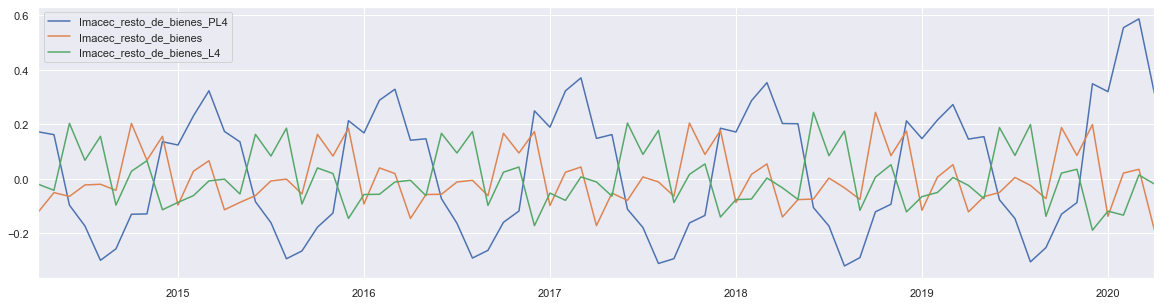

In [663]:
df_spi_3c[['Imacec_resto_de_bienes_PL4','Imacec_resto_de_bienes','Imacec_resto_de_bienes_L4']].plot(figsize=(20,5))

La gráfica de arriba muestra la variable Imacec_resto_de_bienes, la cual se puede ver un retraso con la variable Imacec_resto_de_bienes_L4. No obstante, la variable Imacec_resto_de_bienes_PL4 muestra un retraso todavía mayor y una amplitud más grande. Posiblemente, el lag de la variable Imacec_resto_de_bienes_L4 tuvo que haber sido más y por ello la variable Imacec_resto_de_bienes_PL4 tiene una mejor correlación con la variable objetivo.

# Modelo

Creación del modelo

In [664]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score


#Ajustando todas las variables dentro del mismo rango
arr_sc = preprocessing.scale(df_spi_3c)
df_sc = pd.DataFrame(data=arr_sc, columns =df_spi_3c.columns, index = df_spi_3c.index)

Ciclo para encontrar el mejor corte de los datos para train y test

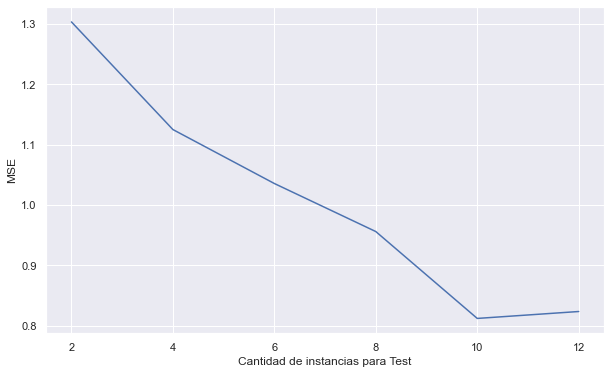

In [665]:
id_cut_list = [2,4,6,8,10,12]
mae_list = []

#Ciclo para cada número de estimadores
for elem in id_cut_list:
    #Separación del dataset train y test
    id_cut = elem
    df_train = df_sc[0:-id_cut]
    df_test = df_sc[-id_cut:]

    X_train = df_train.drop(['Precio_leche'], axis = 1)
    y_train = df_train['Precio_leche']
    
    X_test = df_test.drop(['Precio_leche'], axis = 1)
    y_test = df_test['Precio_leche']
    
    #Creación del modelo
    model = RandomForestRegressor(n_estimators=1000,random_state = 23)
    model.fit(X_train, y_train)

    #Predicción del modelo
    y_pred = model.predict(X_test)

    #Métrica MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    #Guardar los valores
    mae_list.append(mae)
    

# Gráfica de los valores MSE con respecto al número de estimadores 
plt.figure(figsize=(10,6))
plt.xlabel("Cantidad de instancias para Test")
plt.ylabel("MSE")
plt.plot(id_cut_list, mae_list)
plt.show()

Se puede notar que el mejor número de instancias para evaluar el modelo es 10. Esto viene se relaciona con que el modelo de serie de tiempo tiene componentes ciclicos y estacionales los cuales si son eliminados a la hora de entrentar tendrán un impacto negativo en el modelo. 

Posteriormente, se continuó con encontrar el mejor valor para el parámetro de estimadores. 

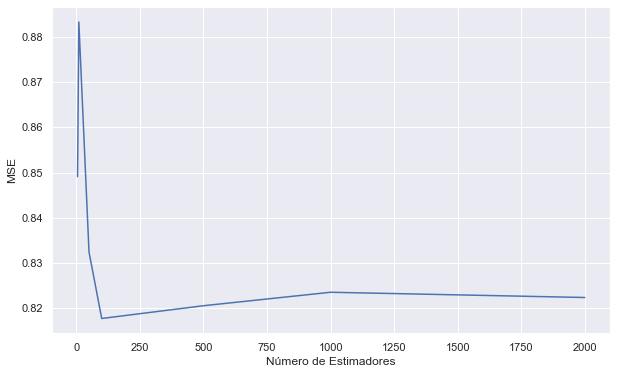

In [666]:
estimators = [5,10,50,100,500,1000,2000]
mae_list = []

#Ciclo para cada número de estimadores
for elem in estimators:
    #Creación del modelo
    model = RandomForestRegressor(n_estimators=elem,random_state = 23)
    model.fit(X_train, y_train)

    #Predicción del modelo
    y_pred = model.predict(X_test)

    #Métricas MAE
    mae = mean_absolute_error(y_test, y_pred)
    
    #Guardar los valores
    mae_list.append(mae)
    

# Gráfica de los valores MSE con respecto al número de estimadores 
plt.figure(figsize=(10,6))
plt.xlabel("Número de Estimadores")
plt.ylabel("MSE")
plt.plot(estimators, mae_list)
plt.show()

En la gráfica de arriba se puede notar un pico y una bajada pronunciada, sin emabargo para mantener una estabilidad  a la hora de volver a correr los modelos con un random state diferente se prefirió dejar un estimador más estable.

Creación del modelo final

In [667]:
#Separación del dataset train y test
id_cut = 10
df_train = df_sc[0:-id_cut]
df_test = df_sc[-id_cut:]

X_train = df_train.drop(['Precio_leche'], axis = 1)
y_train = df_train['Precio_leche']

X_test = df_test.drop(['Precio_leche'], axis = 1)
y_test = df_test['Precio_leche']

#Creación del modelo
model = RandomForestRegressor(n_estimators=1000,random_state = 23)
model.fit(X_train, y_train)

#Predicción del modelo
y_pred = model.predict(X_test)

#Métricas R2 y MAE
mae = mean_absolute_error(y_test, y_pred)

print('MAE: {}'.format(mae))

MAE: 0.8121018537832161


Predición del precio de la leche a un mes.

In [668]:
pct_pred = model.predict(X_test.iloc[0].values.reshape(1,-1))
new_price = df_lec.loc[X_train.index[-1]]['Precio_leche'] * (1+ pct_pred/100)
new_price

array([265.9466522])

Se continuó con el proceso para encontrar las variables más relevantes

<AxesSubplot:>

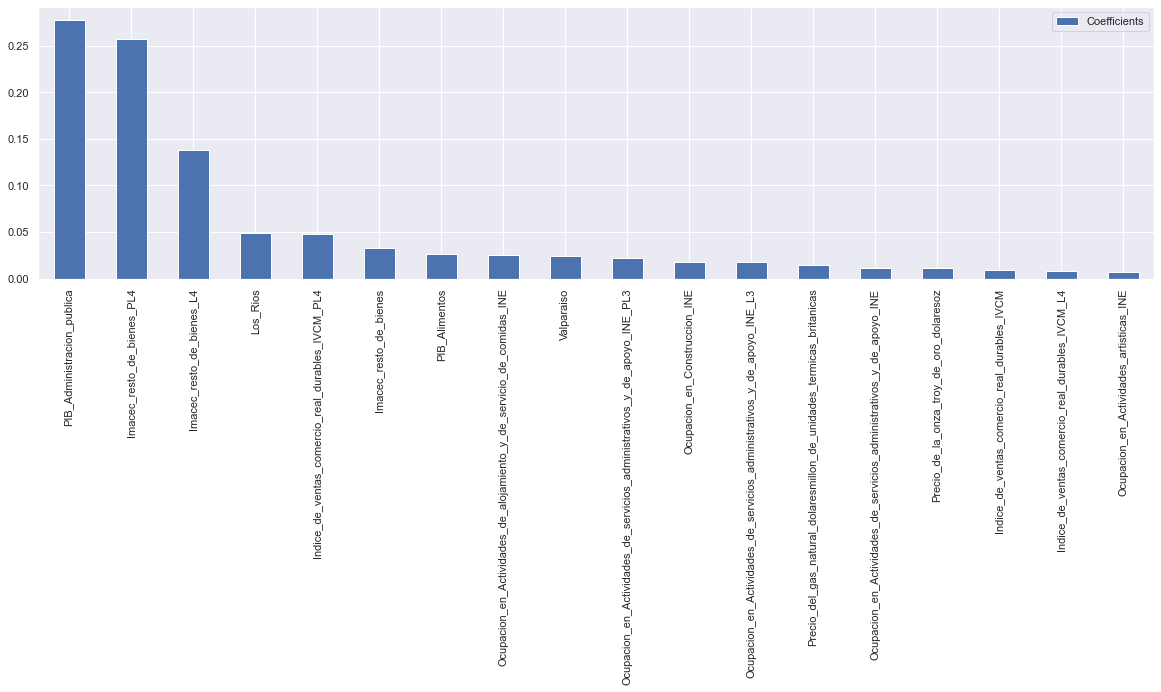

In [669]:
#Obtención de la importancia de cada variable
feat_impor = pd.DataFrame(data= model.feature_importances_, columns = ['Coefficients'],
                          index= df_spi_3c.columns[:-1] )

#Graficación de la importancia de las variables
feat_impor.sort_values(ascending = False, by = 'Coefficients').plot.bar( figsize = (20,5))

Las 3 variables más relevantes fueron PIB_Administración_Pública, Imacec_resto_de_bienes_PL4 y Imacec_resto_de_bienes_L4. 

Notas:
   * La definición de la cantidad/tiempo de los datos para los conjuntos de entrenamiento y de prueba fue basado en tomar diferentes cortes y elegir el mejor. Este procedimiento busca cuidar los ciclos y las estaciones que pudieran tener los datos de entrenamiento.
   * Me hubiese gustado tener más fechas de los datos del PIB, Ocupación y del Índice. Posiblemente se pudieran hacer modelos para generar esos datos. Además, se podría hacer una análsis más detallado sobre la correlación de los lag de cada una de las variables.  Así, como también haber usado una variable lag del precio de la leche. Agregar estas variables posiblemente ayude a mejorar las métricas.
   * El modelo podría mejorar, sin duda. Sin embargo, por ahora fue el mejor modelo contemplando el corte de los datos para entrenar y validar, además de encontrar un valor del estimador para que el modelo fuera estable. 
   * Las métricas que tiene sentido mirar es el MAE o RMSE si se quiere penalizar más los valores lejanos a lo real.
   * Para saber que factores impactan en el precio de la leche. Esto podría servir para los productores de la leche, ellos hacen análsis para comprar futuros u opciones de los precios de sus suministros. Conociendo el precio de la leche pueden ajustar mejor sus gastos. También podría servir para los consumidores de leche en mayoreo.
   * Los modelos de este tipo podrían ayudar a combatir el cambio climático informando a las personas que toman decisiones a que conozcan los factores que impactan en los productos alimenticios y así tomar medidas preventivas. Siempre y cuando el modelo pueda aportar algo de valor para concientizar sobre el impacto de la industria en el medio ambiente. Por ejemplo, en este análsis salió que la precipitación de la región de Los Ríos tiene un imapcto en la predicción de la leche. 
   *Muchas gracias
    